## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

1.

In [ ]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans # Import kmc
import matplotlib.pyplot as plt

In [ ]:

# load in csv data as df
df = pd.read_csv('./airbnb_hw.csv')

In [ ]:
## Cleaning Price, Beds, Number Of Reviews (no need), Review Scores Rating

# renaming long variable names
df['num_reviews'] = df['Number Of Reviews']
df['rating'] = df['Review Scores Rating']

# retreives all row data for each of these variables
data = df.loc[:,['Price','Beds','num_reviews','rating']]

# returns number of rows by columns
print(data.shape)

# get general stats on data
data.describe()

(30478, 4)


,Beds,num_reviews,rating
count,30393.000000,30478.000000,22155.000000
mean,1.530089,12.018735,91.993230
std,1.015359,21.980703,8.850373
min,0.000000,0.000000,20.000000
25%,1.000000,0.000000,89.000000
50%,1.000000,3.000000,94.000000
75%,2.000000,13.000000,100.000000
max,16.000000,257.000000,100.000000


In [ ]:
# cleaning price
data['Price'].value_counts() # numbers have commas in them

150      1481
100      1207
200      1059
125       889
75        873
         ... 
840         1
306         1
2,695       1
2,520       1
291         1
Name: Price, Length: 511, dtype: int64

In [ ]:
data['Price'] = data['Price'].str.replace(',','') # replaces commas with empty space
data["Price"] = pd.to_numeric(data['Price'],errors='coerce') # converts prices values from string data type to numeric
data.describe()

,Price,Beds,num_reviews,rating
count,30478.000000,30393.000000,30478.000000,22155.000000
mean,163.589737,1.530089,12.018735,91.993230
std,197.785454,1.015359,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [ ]:
# cleaning beds
data['Beds'].head(20)

0     1.0
1     1.0
2     1.0
3     3.0
4     3.0
5     1.0
6     1.0
7     1.0
8     2.0
9     2.0
10    2.0
11    2.0
12    2.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    3.0
19    3.0
Name: Beds, dtype: float64

In [ ]:
data['Beds'] = data['Beds'].fillna(1) # replaces null values with 1
data.describe()

,Price,Beds,num_reviews,rating
count,30478.000000,30478.000000,30478.000000,22155.000000
mean,163.589737,1.528611,12.018735,91.993230
std,197.785454,1.014327,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [ ]:
# cleaning rating
pd.crosstab(df['rating'].isnull(), df['num_reviews']>0) # seeing if there is a review, is the rating a null value

# 509 "true missings" - i.e. have a review but a null (missing) rating
# 7814 have no review, and thus have no rating

num_reviews,False,True
rating,,
False,0,22155
True,7814,509


In [ ]:
# just dropping all missing rating values for simplicity

data = data.dropna()
data.describe()

,Price,Beds,num_reviews,rating
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,154.787633,1.556985,16.505439,91.993230
std,148.836621,1.043273,24.308241,8.850373
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,2.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


2.

In [ ]:
# Maxmin normalize the data and remove any nan's (KMeans from sklearn doesn't accept nan input).

def maxmin(x):                      # scales every number to be b/w 0 and 1
    u = (x-min(x))/(max(x)-min(x))
    return u

Z = data.drop('Price',axis=1)  # removes Price column
Z = Z.apply(maxmin)


3.

In [ ]:
# Use sklearn's KMeans module to cluster the data by Beds, Number of Reviews, and Review Scores Rating for k=6

model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0) # Create a model where k (n_clusters) = 6
model = model.fit(Z) # Fit the model
Z['cluster'] = model.labels_
Z.describe()


,Beds,num_reviews,rating,cluster
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,0.097312,0.060568,0.899915,2.040081
std,0.065205,0.094954,0.110630,1.473279
min,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.003906,0.862500,1.000000
50%,0.062500,0.023438,0.925000,1.000000
75%,0.125000,0.074219,1.000000,2.000000
max,1.000000,1.000000,1.000000,5.000000


4.

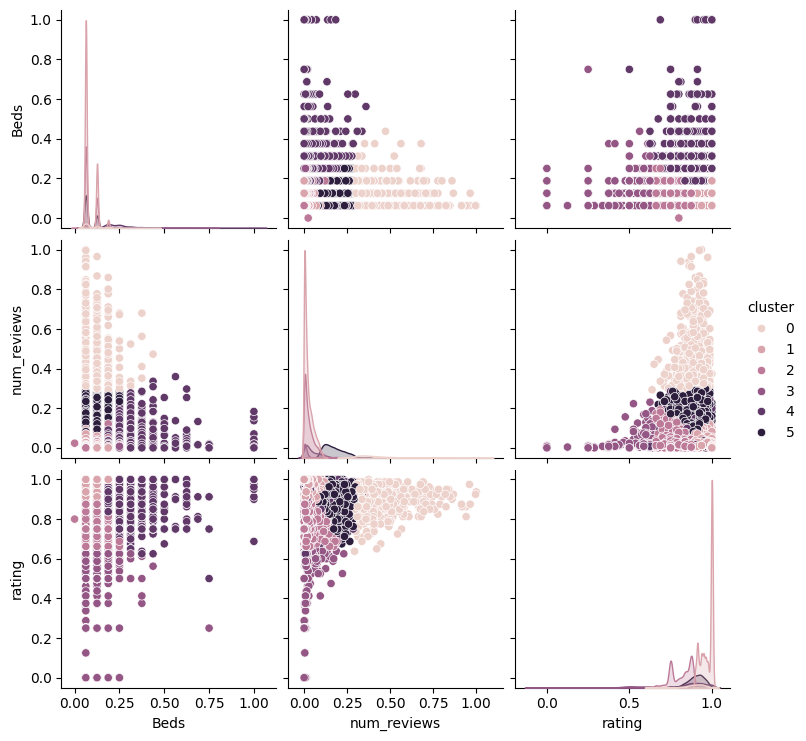

In [ ]:
# Use seaborn's .pairplot() to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.

sns.pairplot(data=Z,hue='cluster')

5.

In [ ]:
# Use .groupby and .describe to compute the average price for each cluster. Which clusters have the highest rental prices?

data['cluster'] = model.labels_
data.loc[:,['Price','cluster'] ].groupby('cluster').describe()

Price                                                              
           count        mean         std   min     25%    50%     75%      max
cluster                                                                       
0          794.0  133.238035   83.077776  27.0   80.00  110.0  168.50    875.0
1        10512.0  152.233352  147.281729  10.0   85.00  130.0  190.00  10000.0
2         5554.0  131.496579  102.621585  20.0   75.00  110.0  169.00   5000.0
3          632.0  133.587025  215.505565  25.0   65.00   99.0  151.25   5000.0
4         1633.0  293.458665  262.439199  27.0  150.00  229.0  350.00   4500.0
5         3030.0  141.674917   84.134011  22.0   87.25  125.0  175.00   1000.0

In [ ]:
# cluster 1 has the highest max price at 10,000
# but cluster 4 has the highest average cost per night and is higher across the 25, 50, and 75% distributions

6.

Text(0.5, 1.0, 'Scree Plot')

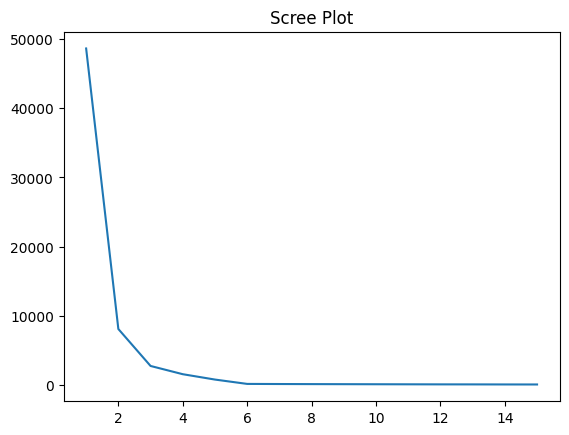

In [ ]:
# Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

k_bar = 15
k_grid = np.arange(1,k_bar+1) # creates a range of k values
SSE = np.zeros(k_bar) # stores training error values in an array of zeros as long as the k_bar value
for k in range(k_bar): # for indices ranging from 0 to k_bar
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # creates a model for k
    model = model.fit(Z) # fits the model
    SSE[k] = model.inertia_ # returns a SSE value for a k and fills it in the SSE array

sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # creates scree plot

In [ ]:
# optimal k value occurs at "elbow" of the scree plot, so ~3 in this case

Price                                                            
           count        mean         std   min   25%    50%     75%      max
cluster                                                                     
0        11306.0  150.899345  143.791840  10.0  85.0  129.0  189.00  10000.0
1         6186.0  131.710152  119.136944  20.0  75.0  110.0  168.75   5000.0
2         4663.0  194.830152  184.264122  22.0  99.0  150.0  225.00   4500.0

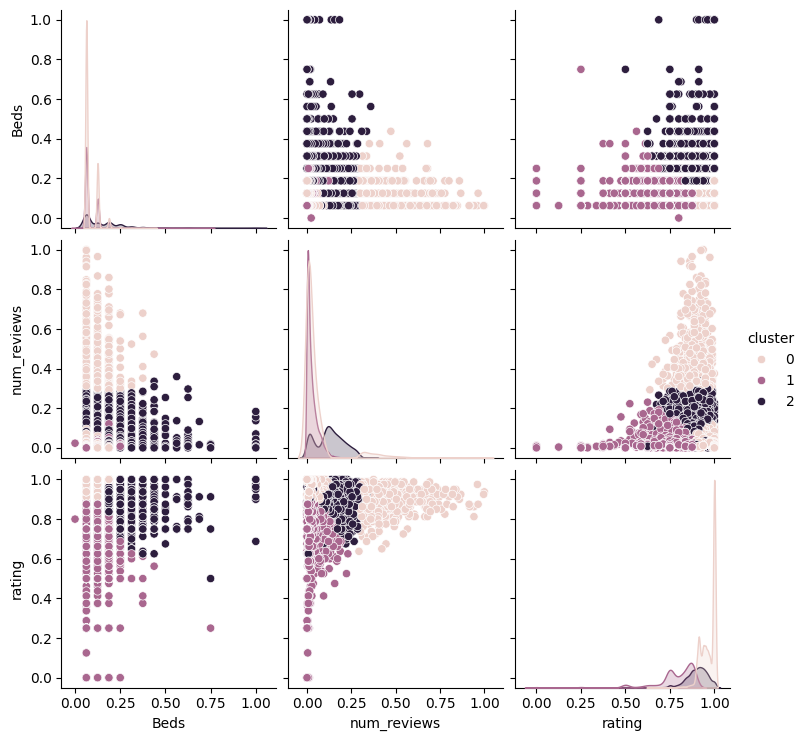

In [ ]:
model = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0) # # Create a model where k (n_clusters) = 3
model = model.fit(Z) # fits the model
Z['cluster'] = model.labels_

sns.pairplot(data=Z,hue='cluster') # uses pairplot() to make a grid of scatterplots to show clustering

# computes the average price for each cluster
data['cluster'] = model.labels_
data.loc[:,['Price','cluster'] ].groupby('cluster').describe()

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

1.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans # Import kmc
import matplotlib.pyplot as plt

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2.

<Axes: xlabel='x1', ylabel='x2'>

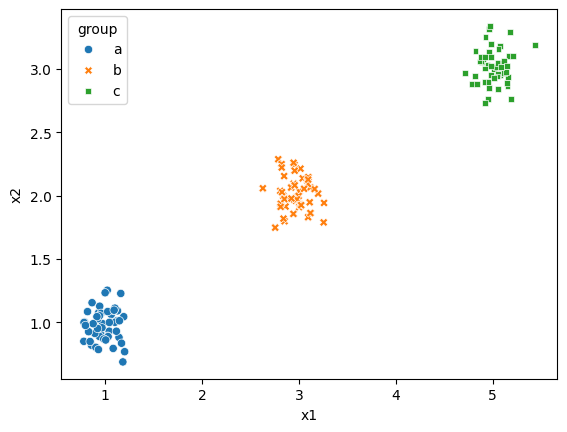

In [ ]:
# Make scatterplots of the  (X1,X2)  points by group for each of the datasets.


sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')


<Axes: xlabel='x1', ylabel='x2'>

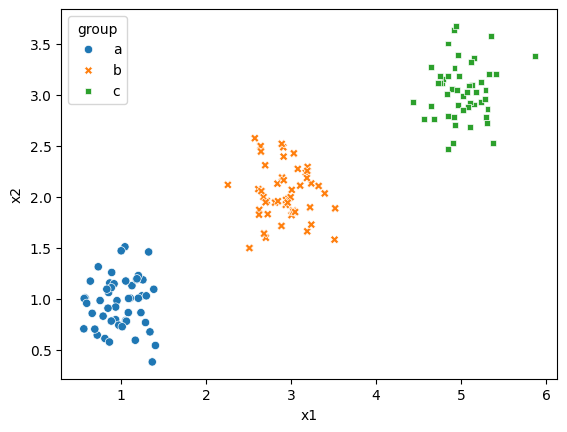

In [ ]:
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')


<Axes: xlabel='x1', ylabel='x2'>

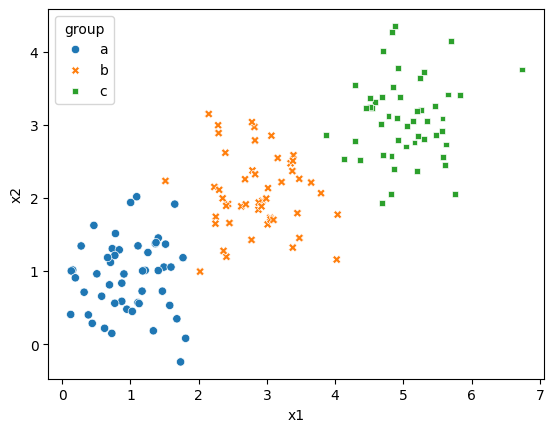

In [ ]:
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')


<Axes: xlabel='x1', ylabel='x2'>

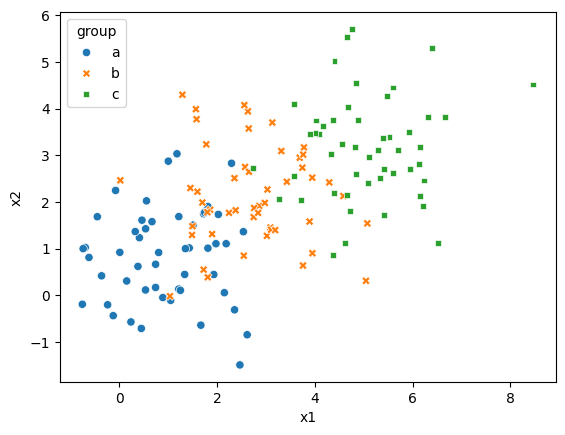

In [ ]:
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')


<Axes: xlabel='x1', ylabel='x2'>

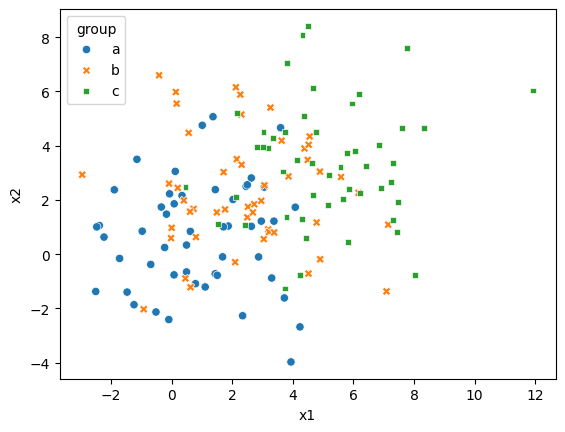

In [ ]:
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')


In [ ]:
# As the noise goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters:
## the visual distinctness decreases as the noise goes up - i.e. the clusters become less clustered

3.

In [ ]:
#Create a scree plot for each of the datasets.

     # plots SSE against diff k values

# Max-min scaler function
def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

def scree(data): # function that makes scree plots quickly

    # Preprocess the data:
    X = data.loc[ : , ['x1','x2'] ] # Select data to cluster
    X = X.apply(maxmin) # Normalize the data

    # Create a scree plot:
    k_bar = 15
    k_grid = np.arange(1,k_bar+1) # The range of k's to consider
    SSE = np.zeros(k_bar) # We'll store the training error here
    for k in range(k_bar): # For indices from 0 to k_bar-1
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
        model = model.fit(X) # Fit the emodel
        SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector
    scree_plot, axes = plt.subplots()
    sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot
    axes.set_ylim(0, 35)


#Describe how the level of noise affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a  k .

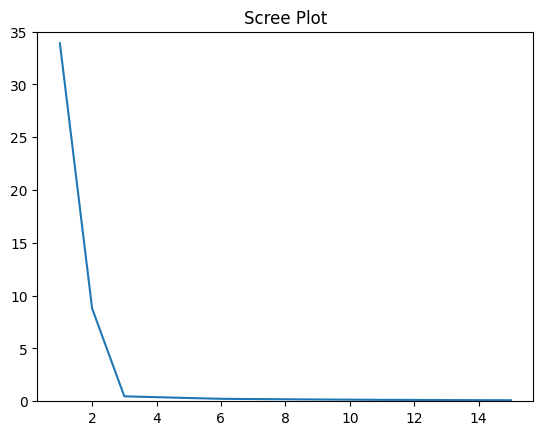

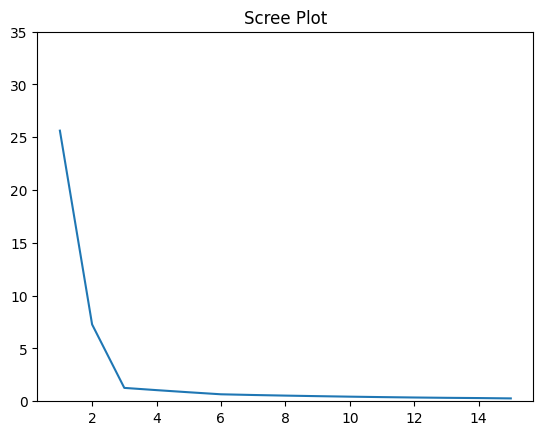

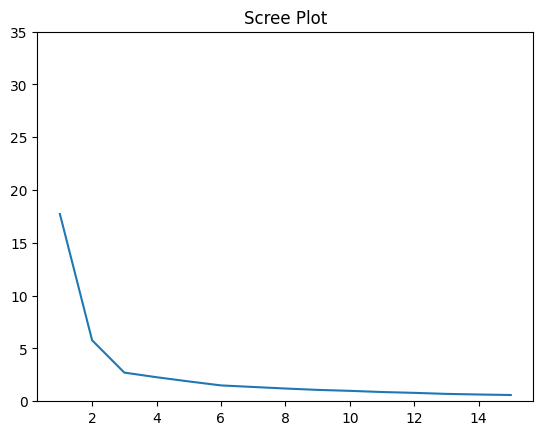

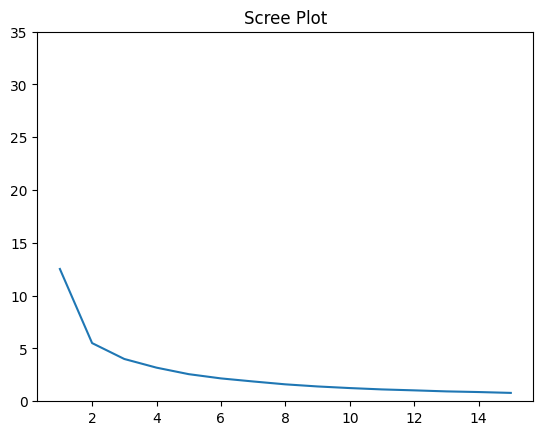

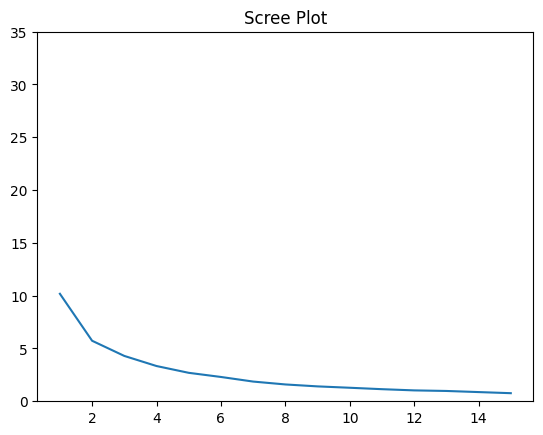

In [ ]:
# can now call scree function for each dataset
scree(df0_125)
scree(df0_25)
scree(df0_5)
scree(df1_0)
scree(df2_0)


In [ ]:
# Describe how the level of noise affects the scree plot (particularly the presence of a clear "elbow")
#  and your ability to definitively select a  k .

## as the level of noise increases it gets harder to identify where the elbow of the plot is, making it harder to definitively select a k value.

4.

In [ ]:
# Explain the intuition of the elbow, using this numerical simulation as an example.

As we saw with the scatterplots, as the noisiness of the data increased, the clusters became less distinct. In the sense of the scree plots, where we are looking at the SSE of a cluster vs. the k value, and ultimately trying to determine the best k value. The best k value is the one that will give us the lowest SSE at the optimal rate, aka the elbow of the plot (not just the highest k, since SSE will always decrease as k increases). Thus, when the clusters become less distinct, so does the evaluation of their SSE, and thus the distinction between these values at differrent k's, making the plot smoother and the elbow harder to identify.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?